In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pylab as plt
import matplotlib

In [2]:
logs_base = '../logs/peregrine'

data_sets = os.listdir(logs_base)

In [3]:
def plot_results(data_set, xlim=(0, 250), ylim=None, lws=False):
    infix = 'lws1s' if lws else ''
    path = os.path.join(logs_base, data_set, infix)
    dfs = []
    for model in os.listdir(path):
        log_path = os.path.join(path, model, 'fold0', 'logs.csv')
        if not os.path.exists(log_path):
            continue
        logs = pd.read_csv(log_path)
        logs['model'] = model
        dfs.append(logs)
    df = pd.concat(dfs)
    
    results = df.pivot(index='epoch', columns='model', values='val_acc')
    results.plot()
    plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    return df

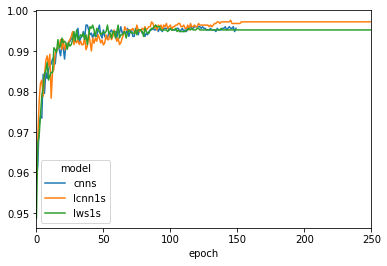

In [6]:
mnist = plot_results('mnist')

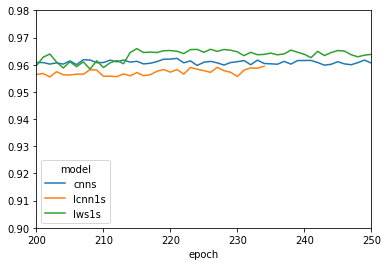

In [12]:
svhn = plot_results('svhn', xlim=(200, 250), ylim=(0.9, 0.98))

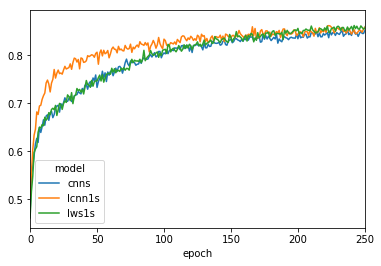

In [25]:
cifar10 = plot_results('cifar10')

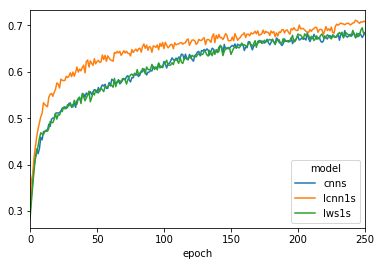

In [26]:
cifar100 = plot_results('cifar100')

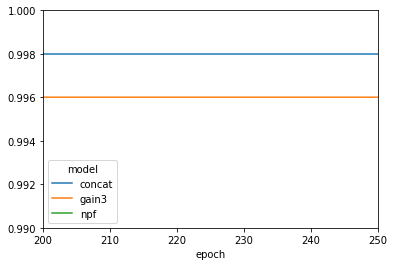

In [4]:
mnist = plot_results('mnist', lws=True, xlim=(200, 250), ylim=(0.99, 1.0))

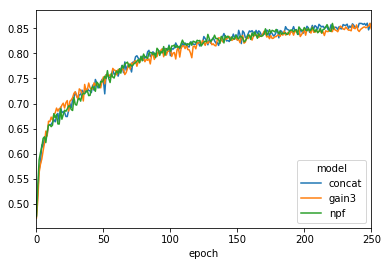

In [5]:
cifar10 = plot_results('cifar10', lws=True)

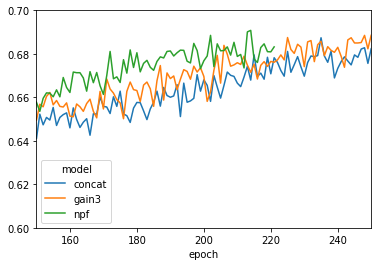

In [11]:
cifar100 = plot_results('cifar100', lws=True, xlim=(150, 250), ylim=(0.6, 0.7))

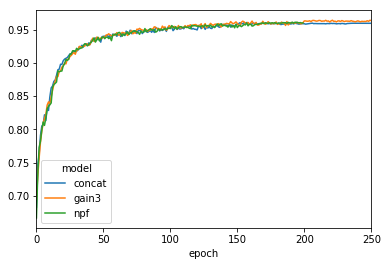

In [7]:
svhn = plot_results('svhn', lws=True, xlim=(150, 250), ylim=(0.6, 0.7))

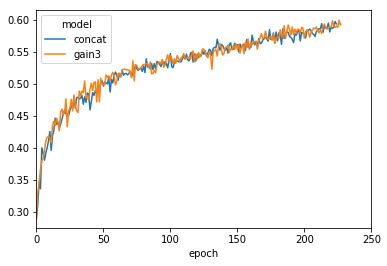

In [10]:
adience = plot_results('fer2013', lws=True)